In [112]:
using DifferentialEquations, LinearAlgebra, Plots

* Zadanie polega na numerycznym rozwiązaniu  danego równania różniczkowego zwyczajnego.
* Należy napisać wlasną implementację metody Eulera 
* porównać ją z  metodą  Rungego-Kutty  (np. dostępną  w dowolnym pakiecie numerycznym - dla tych, co lubia Julię - polecam pakiet DifferentialEquations (https://diffeq.sciml.ai/stable/)) dla zadanego na zajęciach równania. 
* <b>Należy zbadać  stabilność  metod dla różnych wielkości kroków czasowych.</b>

<h3>Punkty:</h3>

* Rozwiązanie metodą Eulera (1pkt)
* Rozwiązanie metodą Rungego-Kutty (1 pkt)
* Porównanie stabilności (1 pkt)
* Ciekawa animacja poza standardowymi wykresami f(t) (1 pkt)
* Ewentualne rozszerzenie (extra 3 pkt)

<h3>Zad 2 - wstęp</h3>

Zasymuluj układ grawitacyjny : gwiazda i przylatujace
cialo niebieskie z pewną (zadawana przez uzytkownika) prędkością 
poczatkową. 

$$ \frac{d^2\bf{r}}{dt^2}=−G\frac{M_1+M_2}{r^3}\bf r$$

To jest równanie różniczkowe drugiego rzędu. Po lewej znajduje się druga pochodna po czasie $t$. Pierwszą pochodną położenia po czasie ${\bf r}$ jest prędkość ${\bf v}= d{\bf r}/dt$, a druga pochodna to przyspieszenie. Na podstawie tego wnioskujemy, że: 
$${\bf a}= \frac{d\bf{v}}{dt} = \frac{d^2\bf{r}}{dt^2} = −G\frac{M_1+M_2}{r^3}\bf r$$

In [113]:
function gravitational_system!(du, u, p, t)
    r = u[1:2]  # Współrzędne położenia
    v = u[3:4]  # Współrzędne prędkości
    
    # Parametry
    G = p[1]    # Stała grawitacyjna
    M_star = p[2]  # Masa gwiazdy
    M_body = p[3]  # Masa przelatującego ciała
    
    # Obliczanie przyspieszenia
    a = -G * ((M_star + M_body) / norm(r)^3) * r
    
    du[1:2] = v  # Prędkość to pochodna położenia
    du[3:4] = a  # Przyspieszenie to pochodna prędkości
end;

In [114]:
# Parametry symulacji
G = 6.67430e-11  # Stała grawitacyjna (m^3 kg^−1 s^−2)
M_star = 2.0e10  # Masa gwiazdy (kg)
M_body = 1.0e5  # Masa przelatującego ciała (kg)
r0 = [1.0, 0.0]  # Początkowe położenie przylatującego ciała (m)
v0 = [0.0, 1.2]  # Początkowa prędkość przylatującego ciała (m/s)
tspan = (0.0, 10.0)  # Zakres czasu symulacji
dt = 0.15
tstops = tspan[1]:dt:tspan[2]
lims = 5


u0 = [r0[1], r0[2], v0[1], v0[2]]
p = [G, M_star, M_body];

## Rozwiązanie i wizualizacja
* Rozwiązanie metodą Eulera (1pkt)
* Rozwiązanie metodą Rungego-Kutty (1 pkt)
* Ciekawa animacja poza standardowymi wykresami f(t) (1 pkt)


Metoda Eulera

[ Info: Saved animation to c:\Users\iwosz\JuliaProjects\MOWNiT\Mownit_Lab10\gravitational_animation_EULER.gif


Plots.AnimatedGif("c:\\Users\\iwosz\\JuliaProjects\\MOWNiT\\Mownit_Lab10\\gravitational_animation_EULER.gif")
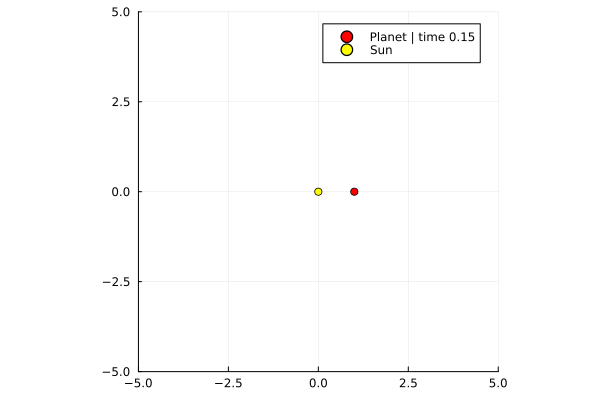

In [115]:

prob = ODEProblem(gravitational_system!, u0, tspan, p)
sol = solve(prob, Euler(), tstops = tstops)

animation = @animate for i = 1:length(sol.t)
    scatter( [sol.u[i][1]], [sol.u[i][2]], aspect_ratio=:equal, xlims=(-lims, lims), ylims=(-lims, lims), color= "red", label = "Planet | time $dt")
    scatter!( [0], [0], color = "yellow", label = "Sun")
    # plot!([0, sol.u[i][1]], [0, sol.u[i][2]])
end
gif(animation, "gravitational_animation_EULER.gif", fps = 30)


Metoda Rungego-Kutty

[ Info: Saved animation to c:\Users\iwosz\JuliaProjects\MOWNiT\Mownit_Lab10\gravitational_animation_RK.gif


Plots.AnimatedGif("c:\\Users\\iwosz\\JuliaProjects\\MOWNiT\\Mownit_Lab10\\gravitational_animation_RK.gif")
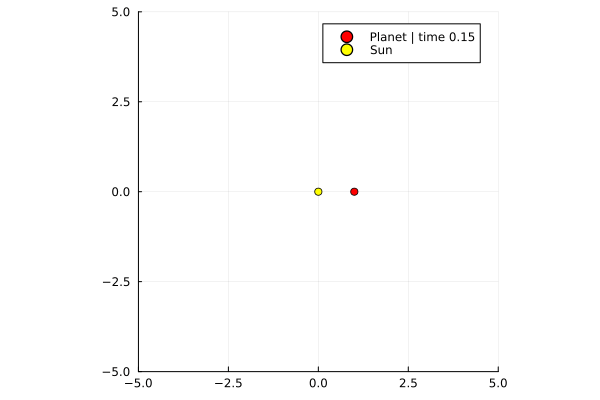

In [116]:

prob = ODEProblem(gravitational_system!, u0, tspan, p)
sol_RK = solve(prob, RK4(), tstops = tstops)


animation = @animate for i = 1:length(sol_RK.t)
    scatter( [sol_RK.u[i][1]], [sol_RK.u[i][2]], aspect_ratio=:equal, xlims=(-lims, lims), ylims=(-lims, lims), color= "red", label = "Planet | time $dt")
    scatter!( [0], [0], color = "yellow", label = "Sun")
    # plot!([0, sol_RK.u[i][1]], [0, sol_RK.u[i][2]])
end
gif(animation, "gravitational_animation_RK.gif", fps = 30)


## Porównanie stabilności
* Porównanie stabilności (1 pkt)
* Ciekawa animacja poza standardowymi wykresami f(t) (1 pkt)


Metoda Eulera

[ Info: Saved animation to c:\Users\iwosz\JuliaProjects\MOWNiT\Mownit_Lab10\gravitational_animation_dt.gif


Plots.AnimatedGif("c:\\Users\\iwosz\\JuliaProjects\\MOWNiT\\Mownit_Lab10\\gravitational_animation_dt.gif")
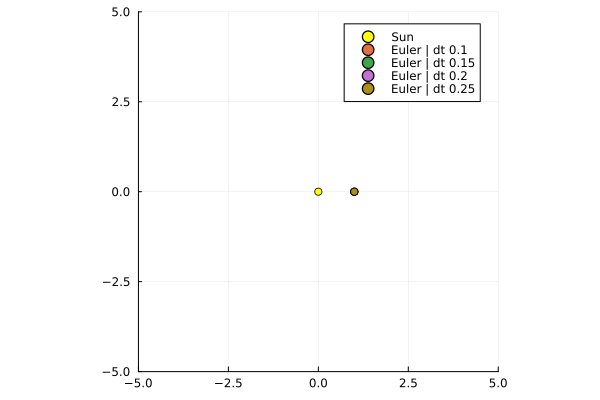

In [117]:
DTs = [0.1 0.15 0.2 0.25]
sols = []
for dt in DTs
    tstops = tspan[1]:dt:tspan[2]
    prob = ODEProblem(gravitational_system!, u0, tspan, p)
    sol = solve(prob, Euler(), tstops = tstops)
    push!(sols, sol)
end

animation = @animate for i = 1:length(sol.t)
    scatter( [0], [0], color = "yellow", label = "Sun")
    j = 1
    for sol in sols
        curr = DTs[j]
        scatter!( [sol.u[i][1]], [sol.u[i][2]], aspect_ratio=:equal, xlims=(-lims, lims), ylims=(-lims, lims), label = "Euler | dt $curr")
        # plot!([0, sol.u[i][1]], [0, sol.u[i][2]])
        j += 1
    end
end
gif(animation, "gravitational_animation_dt.gif", fps = 30)


Metoda Rungego-Kutty

[ Info: Saved animation to c:\Users\iwosz\JuliaProjects\MOWNiT\Mownit_Lab10\gravitational_animation_RK_dt.gif


Plots.AnimatedGif("c:\\Users\\iwosz\\JuliaProjects\\MOWNiT\\Mownit_Lab10\\gravitational_animation_RK_dt.gif")
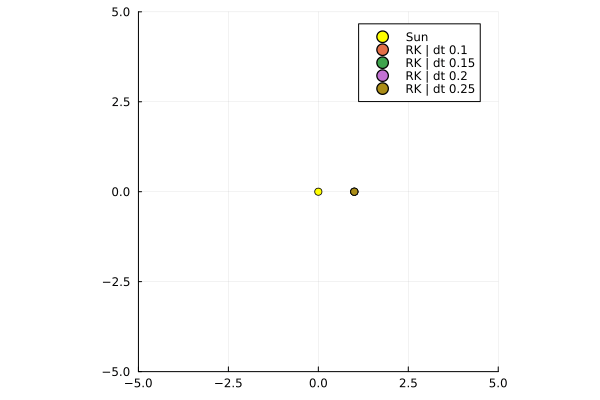

In [118]:
DTs = [0.1 0.15 0.2 0.25]
sol_RKs = []
for dt in DTs
    tstops = tspan[1]:dt:tspan[2]
    prob = ODEProblem(gravitational_system!, u0, tspan, p)
    sol_RK = solve(prob, RK4(), tstops = tstops)
    push!(sol_RKs, sol_RK)
end

animation = @animate for i = 1:length(sol_RK.t)
    scatter( [0], [0], color = "yellow", label = "Sun")
    j = 1
    for sol_RK in sol_RKs
        curr = DTs[j]
        scatter!( [sol_RK.u[i][1]], [sol_RK.u[i][2]], aspect_ratio=:equal, xlims=(-lims, lims), ylims=(-lims, lims), label = "RK | dt $curr")
        # plot!([0, sol_RK.u[i][1]], [0, sol_RK.u[i][2]])
        j += 1
    end
end
gif(animation, "gravitational_animation_RK_dt.gif", fps = 30)


### Porównanie stabilności na jednym wykresie

[ Info: Saved animation to c:\Users\iwosz\JuliaProjects\MOWNiT\Mownit_Lab10\gravitational_animation_dt_compare.gif


Plots.AnimatedGif("c:\\Users\\iwosz\\JuliaProjects\\MOWNiT\\Mownit_Lab10\\gravitational_animation_dt_compare.gif")
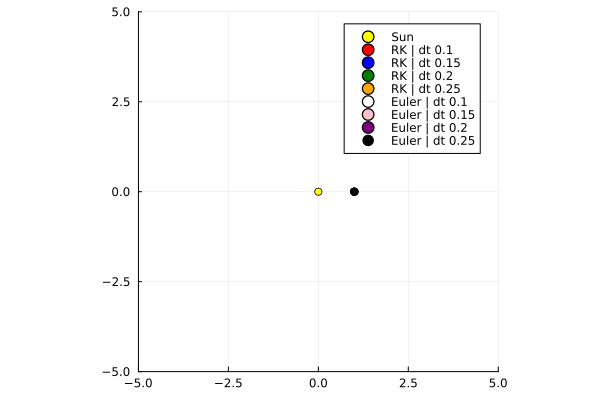

In [119]:
animation = @animate for i = 1:length(sol.t)
    cols = ["red" "blue" "green" "orange" "white" "pink" "purple" "black"]
    scatter( [0], [0], color = "yellow", label = "Sun")
    j = 1
    k = 1
    for sol_RK in sol_RKs
        curr = DTs[j]
        scatter!( [sol_RK.u[i][1]], [sol_RK.u[i][2]], aspect_ratio=:equal, xlims=(-lims, lims), ylims=(-lims, lims), label = "RK | dt $curr", color = cols[j+k-1])
        j += 1
    end
    for sol in sols
        curr = DTs[k]
        scatter!( [sol.u[i][1]], [sol.u[i][2]], aspect_ratio=:equal, xlims=(-lims, lims), ylims=(-lims, lims), label = "Euler | dt $curr", color = cols[j+k-1])
        k += 1
    end
end
gif(animation, "gravitational_animation_dt_compare.gif", fps = 30)

<h4> Różnica w stabilności obu metod jest znaczna. Dla tych samych danych planeta w przypadku metody Eulera - wraz z coraz większym dt coraz szybciej ucieka z orbity, w przypadku metody Rungego-Kutty nie widać takiej zależności. Płynność animacji wskazuje też na większe obciążenie obliczeniowe przy metodzie Rungego-Kutty. <h4\>